# Performance of Classifiers Model Using Portuguese banking institution

The goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) 

## 1-/ Import all the necessary libraries

In [35]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 58.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 72.6 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
import seaborn as sns

## 2-/Import the data

In [20]:
bank=pd.read_csv("bank-full.csv", sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3-/identify any missing values, get data info, and describe the data 

In [21]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [22]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [23]:
bank.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


## 4-/Data Preparation

In [25]:
#Preprocessing
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [27]:
X = bank.drop('y', axis=1)
y = bank['y'].apply(lambda x: 1 if x == 'yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5-/Model Training, Evaluation, and Vizualisation

In [32]:
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

model_accuracies = {}

/Users/vincenttanoe/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: KNN
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.38      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.71      9043
weighted avg       0.88      0.90      0.89      9043



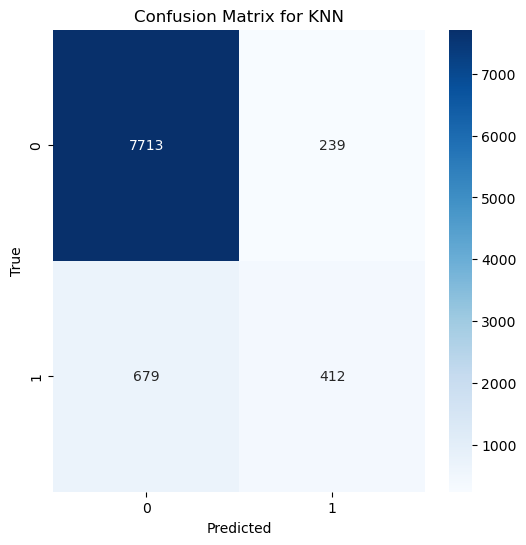

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



/Users/vincenttanoe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


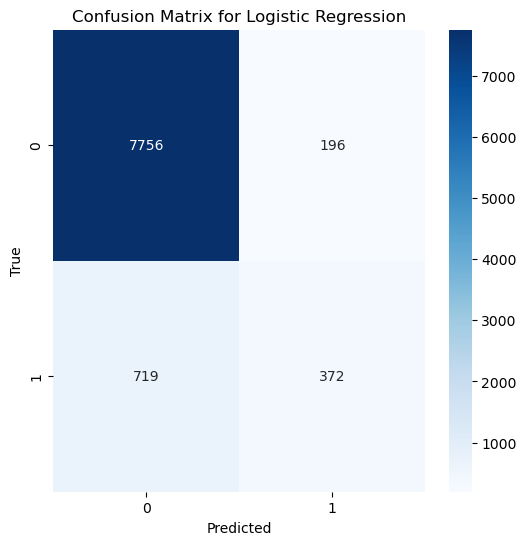

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.50      0.49      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.88      0.87      0.87      9043



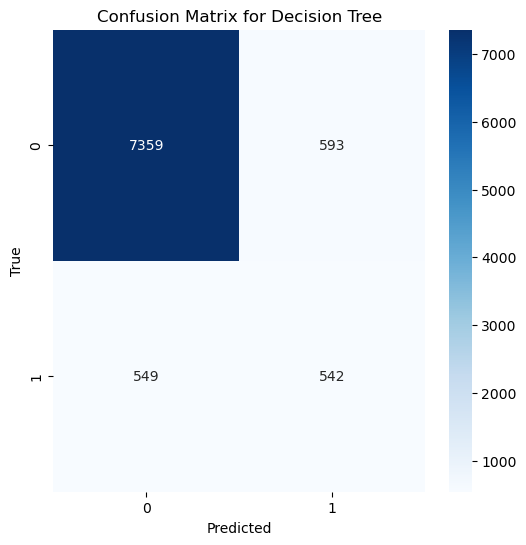

Model: SVM
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.69      0.36      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



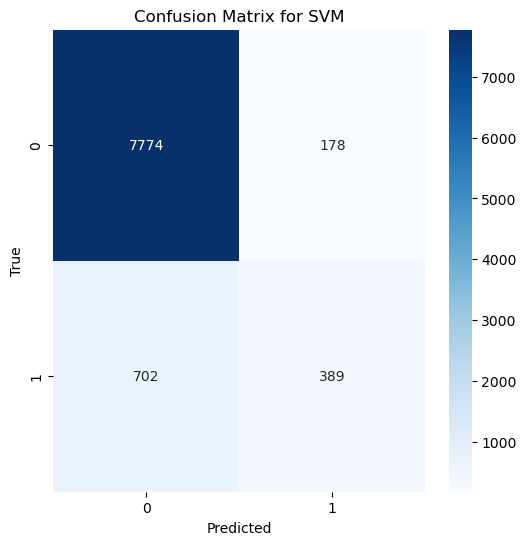

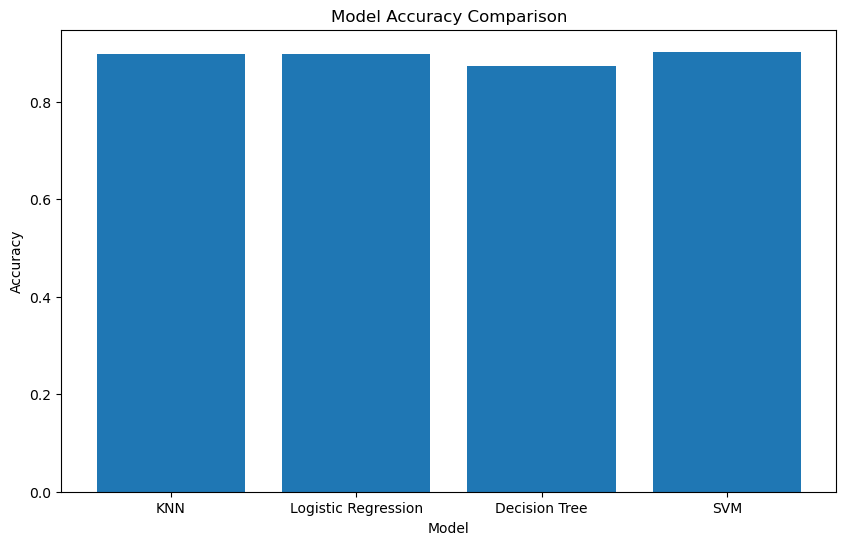

In [33]:
# Training and Evaluation with Visualization
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Accuracy and Classification Report
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Bar Chart for Model Comparison
plt.figure(figsize=(10,6))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

## 6-/Model performance interpretation

The results from the four models provide insightful details about their performance in predicting two classes (labelled as "0" and "1")

### K-Nearest Neighbors (KNN)
High Precision for Class 0:The KNN model shows a high precision (92%) for class 0, indicating that when it predicts a data point as class 0, it is correct 92% of the time.
Moderate Precision and Low Recall for Class 1:For class 1, the precision is moderate (63%) but with a lower recall (38%). This suggests the model is more cautious in predicting class 1; when it does predict class 1, it's fairly accurate, but it misses many actual class 1 instances.
Overall Accuracy:The overall accuracy is 90%, showing good performance but indicating potential issues with class imbalance or model sensitivity to class 1.

### Logistic Regression
Similar Performance to KNN for Class 0:Logistic Regression also performs well in identifying class 0 (92% precision) but slightly worse in predicting class 1 (65% precision) with a low recall (34%).
Overall Performance:The overall accuracy is 90%, mirroring the KNN model. This model also struggles with predicting class 1 correctly.

### Decision Tree
Balanced Precision and Recall:The Decision Tree model shows a more balanced performance between precision and recall for both classes. However, its precision for class 1 (48%) is lower compared to the other models.
Lower Overall Accuracy:With an overall accuracy of 88%, it's slightly less accurate than KNN and Logistic Regression but offers a more balanced approach in predicting both classes.

### Support Vector Machine (SVM)
Best Precision for Class 1:SVM shows the best precision (69%) for class 1 among all models, suggesting it's more reliable when identifying class 1 instances.
Low Recall for Class 1:However, its recall for class 1 (36%) is low, indicating it misses a significant number of actual class 1 instances.
High Accuracy for Class 0:The model is highly accurate (92% precision) in predicting class 0, similar to the other models.
Overall Accuracy:The overall accuracy is 90%, in line with KNN and Logistic Regression.